In [1]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x


# Ja li tudo
# https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html

# How do I use make a convolutional layer for tabular (1-D) features?
# https://stackoverflow.com/questions/59756806/tensorflow-how-do-i-use-make-a-convolutional-layer-for-tabular-1-d-features

# TODO: Fiquei de verificar:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [2]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

# Lendo Dfs

In [3]:
import pathlib
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ModelCheckpoint
import keras_tuner as kt

# 80%
PATH_TREINO = "../Data/3_Gold/Treino_all_stocks.csv"
DF_TREINO = pd.read_csv(PATH_TREINO, sep=",")
train_dataset = DF_TREINO
train_dataset = train_dataset.drop(
    [
        "oil_5",
        "usd_5",
        "abev_5",
        "jbs_5",
        "petr_5",
        "vale_5",
    ],
    axis=1,
)
train_labels = train_dataset.pop("ibova_5")

# 20%
PATH_TESTE = "../Data/3_Gold/Teste_all_stocks.csv"
DF_TESTE = pd.read_csv(PATH_TESTE, sep=",")
test_dataset = DF_TESTE
test_dataset = test_dataset.drop(
    [
        "oil_5",
        "usd_5",
        "abev_5",
        "jbs_5",
        "petr_5",
        "vale_5",
    ],
    axis=1,
)
test_labels = test_dataset.pop("ibova_5")

"""
	Resultado
"""

list_activation = []
list_best_epoch = []
list_best_model_path = []
list_hp_unit_1 = []
list_hp_unit_2 = []
list_hp_unit_3 = []
list_hp_unit_4 = []
list_kernel_size_1 = []
list_kernel_size_2 = []
list_learning_rate = []
list_n_filter_1 = []
list_n_filter_2 = []
list_val_mae = []
list_val_mse = []


df_results = pd.DataFrame(
    columns=[
        "best_epoch",
        "val_mae",
        "val_mse",
        "n_filter_1",
        "n_filter_2",
        "kernel_size_1",
        "kernel_size_2",
        "learning_rate",
        "activation",
    ]
)

<IPython.core.display.Javascript object>

In [4]:
def get_results(history, best_hps, bst_model_path):
    # Select the best epoch,
    val_mse_per_epoch = history.history["val_mse"]
    best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1

    try:
        value_activation = best_hps.get("activation")
    except:
        value_activation = None
    try:
        value_learning_rate = best_hps.get("learning_rate")
    except:
        value_learning_rate = None
    try:
        value_unit_1 = best_hps.get("unit_1")
    except:
        value_unit_1 = None
    try:
        value_unit_2 = best_hps.get("unit_2")
    except:
        value_unit_2 = None
    try:
        value_unit_3 = best_hps.get("unit_3")
    except:
        value_unit_3 = None
    try:
        value_unit_4 = best_hps.get("unit_4")
    except:
        value_unit_4 = None
    try:
        value_kernel_size_1 = best_hps.get("kernel_size_1")
    except:
        value_kernel_size_1 = None
    try:
        value_kernel_size_2 = best_hps.get("kernel_size_2")
    except:
        value_kernel_size_2 = None
    try:
        value_n_filter_1 = best_hps.get("n_filter_1")
    except:
        value_n_filter_1 = None
    try:
        value_n_filter_2 = best_hps.get("n_filter_2")
    except:
        value_n_filter_2 = None

    """"Repeticao MODEL.ipynb"""

    def save_in_list(one_list, value=None):
        try:
            one_list.append(value)
            return one_list
        except:
            one_list.append(None)
            return one_list

    save_in_list(list_activation, value_activation)
    save_in_list(list_best_epoch, best_epoch)
    save_in_list(list_best_model_path, bst_model_path)
    save_in_list(list_hp_unit_1, value_unit_1)
    save_in_list(list_hp_unit_2, value_unit_2)
    save_in_list(list_hp_unit_3, value_unit_3)
    save_in_list(list_hp_unit_4, value_unit_4)
    save_in_list(list_kernel_size_1, value_kernel_size_1)
    save_in_list(list_kernel_size_2, value_kernel_size_2)
    save_in_list(list_learning_rate, value_learning_rate)
    save_in_list(list_n_filter_1, value_n_filter_1)
    save_in_list(list_n_filter_2, value_n_filter_2)
    save_in_list(list_val_mae, min(history.history["val_mae"]))
    save_in_list(list_val_mse, min(history.history["val_mse"]))

    # print(f"list_activation: {list_activation}")
    # print(f"list_best_epoch: {list_best_epoch}")
    # print(f"list_best_model_path: {list_best_model_path}")
    # print(f"list_hp_unit_1: {list_hp_unit_1}")
    # print(f"list_hp_unit_2: {list_hp_unit_2}")
    # print(f"list_hp_unit_3: {list_hp_unit_3}")
    # print(f"list_hp_unit_4: {list_hp_unit_4}")
    # print(f"list_kernel_size_1: {list_kernel_size_1}")
    # print(f"list_kernel_size_2: {list_kernel_size_2}")
    # print(f"list_learning_rate: {list_learning_rate}")
    # print(f"list_n_filter_1: {list_n_filter_1}")
    # print(f"list_n_filter_2: {list_n_filter_2}")
    # print(f"list_val_mae: {list_val_mae}")
    # print(f"list_val_mse: {list_val_mse}")

<IPython.core.display.Javascript object>

In [5]:
def save_df_results(save_time):

    result_columns = [
        "activation",
        "best_epoch",
        "best_model_path",
        "hp_unit_1",
        "hp_unit_2",
        "hp_unit_3",
        "hp_unit_4",
        "kernel_size_1",
        "kernel_size_2",
        "learning_rate",
        "n_filter_1",
        "n_filter_2",
        "val_mae",
        "val_mse",
    ]

    data = list(
        zip(
            list_activation,
            list_best_epoch,
            list_best_model_path,
            list_hp_unit_1,
            list_hp_unit_2,
            list_hp_unit_3,
            list_hp_unit_4,
            list_kernel_size_1,
            list_kernel_size_2,
            list_learning_rate,
            list_n_filter_1,
            list_n_filter_2,
            list_val_mae,
            list_val_mse,
        )
    )

    df_resultados = pd.DataFrame(
        data,
        columns=result_columns,
    )

    df_resultados.to_csv(f"Resultados_{TYPE_MODEL}_{save_time}.csv")
    return df_resultados

<IPython.core.display.Javascript object>

# Definindo o modelo

In [6]:
def model_builder(hp):
    hp_unit_1 = hp.Int("unit_1", min_value=16, max_value=64, step=1)
    activationL = [
        "relu",
        "sigmoid",
        "softplus",
        "softsign",
        "tanh",
        "selu",
        "elu",
        "exponential",
        "relu",
    ]
    activation_choice = hp.Choice("activation", values=activationL)
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model = keras.models.Sequential(
        [
            layers.LSTM(
                units=hp_unit_1,
                return_sequences=True,
                input_shape=(36, 1),
                activation=activation_choice,
            ),
            tf.keras.layers.Flatten(),
            layers.Dense(units=1, activation="linear"),
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="mse",
        metrics=["mae", "mse"],
    )

    return model


# rmse pra avaliação, nao para loss

<IPython.core.display.Javascript object>

# Selecionando a melhor epoca do modelo

In [7]:
def repetir(SAVE_TIME, EPOCHS, epochs_to_search, TYPE_MODEL):
    best_hps = None
    history = None
    bst_model_path = None
    tuner = None

    tuner = kt.Hyperband(
        model_builder,
        objective="val_mse",
        max_epochs=10,
        factor=3,
        directory="logs",
        project_name=f"{TYPE_MODEL}_hyper_parameters",
    )

    # Buscando hyper parametros
    tuner.search(
        train_dataset,
        train_labels,
        epochs=epochs_to_search,
        validation_split=0.2,
        verbose=0,
    )

    best_hps = tuner.get_best_hyperparameters(num_trials=100)[0]

    # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
    bst_model_path = f"Models/{TYPE_MODEL}/model_{TYPE_MODEL}_{SAVE_TIME}.h5"
    model_checkpoint = ModelCheckpoint(
        bst_model_path, save_best_only=True, monitor="val_mse", mode="min"
    )

    model = tuner.hypermodel.build(best_hps)
    history = model.fit(
        train_dataset,
        train_labels,
        epochs=EPOCHS,
        validation_split=0.2,
        verbose=0,
        callbacks=([model_checkpoint]),
    )

    # Select the best epoch,
    val_mse_per_epoch = history.history["val_mse"]
    best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1

    # Saving results in lists
    get_results(history, best_hps, bst_model_path)

<IPython.core.display.Javascript object>

In [8]:
TYPE_MODEL = "CNN"
REPETICAO = 10
EPOCHS = 500
epochs_to_search = 3

for i in range(REPETICAO):
    SAVE_TIME = datetime.datetime.strftime(datetime.datetime.now(), "%y_%m_%d_%Hh%Mm%S")
    repetir(SAVE_TIME, EPOCHS, epochs_to_search, TYPE_MODEL)

df_resultados = save_df_results(SAVE_TIME)
df_resultados

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project logs\CNN_hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\CNN_hyper_parameters\tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project logs\CNN_hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\CNN_hyper_parameters\tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project logs\CNN_hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\CNN_hyper_parameters\tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project logs\CNN_hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\CNN_hyper_parameters\tuner0.json
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Reloading Oracle from existing project logs\CNN_hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\CNN

,activation,best_epoch,best_model_path,hp_unit_1,hp_unit_2,hp_unit_3,hp_unit_4,kernel_size_1,kernel_size_2,learning_rate,n_filter_1,n_filter_2,val_mae,val_mse
0,tanh,238,Models/CNN/model_CNN_22_10_15_17h58m05.h5,None,None,None,None,13,None,0.01,13,None,0.153502,0.039087
1,tanh,259,Models/CNN/model_CNN_22_10_15_18h00m41.h5,None,None,None,None,13,None,0.01,13,None,0.154605,0.039463
2,tanh,5,Models/CNN/model_CNN_22_10_15_18h01m54.h5,None,None,None,None,13,None,0.01,13,None,0.159591,0.040839
3,tanh,418,Models/CNN/model_CNN_22_10_15_18h03m07.h5,None,None,None,None,13,None,0.01,13,None,0.158443,0.040577
4,tanh,76,Models/CNN/model_CNN_22_10_15_18h04m20.h5,None,None,None,None,13,None,0.01,13,None,0.156784,0.040313
5,tanh,74,Models/CNN/model_CNN_22_10_15_18h05m34.h5,None,None,None,None,13,None,0.01,13,None,0.155971,0.039417
6,tanh,92,Models/CNN/model_CNN_22_10_15_18h06m47.h5,None,None,None,None,13,None,0.01,13,None,0.157487,0.039923
7,tanh,12,Models/CNN/model_CNN_22_10_15_18h07m58.h5,None,None,None,None,13,None,0.01,13,None,0.156877,0.040248
8,tanh,6,Models/CNN/model_CNN_22_10_15_18h09m12.h5,None,None,None,None,13,None,0.01,13,None,0.156323,0.040188
9,tanh,31,Models/CNN/model_CNN_22_10_15_18h10m26.h5,None,None,None,None,13,None,0.01,13,None,0.156624,0.039842


<IPython.core.display.Javascript object>

In [9]:
kt.results_summary(num_trials=10)

AttributeError: module 'keras_tuner' has no attribute 'results_summary'

<IPython.core.display.Javascript object>

In [ ]:
print("Best epoch: %d" % (best_epoch,))
print(f'val_mae: {min(history.history["val_mae"])}')
print(f'val_mse: {min(history.history["val_mse"])}')

print(f'n_filter_1: {best_hps.get("n_filter_1")}')
# print(f'n_filter_2: {best_hps.get("n_filter_2")}')
print(f'kernel_size_1: {best_hps.get("kernel_size_1")}')
# print(f'kernel_size_2: {best_hps.get("kernel_size_2")}')

# print(f'unit_3: {best_hps.get("unit_3")}')
# print(f'unit_4: {best_hps.get("unit_4")}')
print(f'learning_rate: {best_hps.get("learning_rate")}')
print(f'activation: {best_hps.get("activation")}')

n_filter_1: 4
kernel_size_1: 1
learning_rate: 0.01
activation: exponential


<IPython.core.display.Javascript object>

In [ ]:
# for REPETICAO, value in enumerate((df_results)):
df_results.loc[REPETICAO, "best_model_path"] = bst_model_path
df_results.loc[REPETICAO, "best_epoch"] = best_epoch
df_results.loc[REPETICAO, "val_mae"] = min(history.history["val_mae"])
df_results.loc[REPETICAO, "val_mse"] = min(history.history["val_mse"])
df_results.loc[REPETICAO, "n_filter_1"] = best_hps.get("n_filter_1")
df_results.loc[REPETICAO, "n_filter_2"] = None
df_results.loc[REPETICAO, "kernel_size_1"] = best_hps.get("kernel_size_1")
df_results.loc[REPETICAO, "kernel_size_2"] = None
df_results.loc[REPETICAO, "learning_rate"] = best_hps.get("learning_rate")
df_results.loc[REPETICAO, "activation"] = best_hps.get("activation")

df_results
# bst_model_path

,best_epoch,val_mae,val_mse,n_filter_1,n_filter_2,kernel_size_1,kernel_size_2,learning_rate,activation,best_model_path
3,1,NaN,NaN,4,None,1,None,0.01,exponential,Models/CNN/model_22_10_15_15h50m36.h5


<IPython.core.display.Javascript object>

In [ ]:
model.teste()

In [ ]:
df_results.to_csv(
    f"Parameter_{TYPE_MODEL}",
    header=True,
)

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 36, 4)             8         
                                                                 
 flatten_9 (Flatten)         (None, 144)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 145       
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

# Treinando modelo

In [ ]:
# hypermodel = tuner.hypermodel.build(best_hps)
# history = hypermodel.fit(train_dataset, train_labels, epochs=best_epoch, validation_split=0.2, verbose=1)

# # ja pega o modelo na melhor epoca

<IPython.core.display.Javascript object>

In [ ]:
eval_result = model.evaluate(test_dataset, test_labels)
print("[test loss, test accuracy]:", eval_result)

15/15 [==============================] - 0s 4ms/step - loss: 0.1587 - mae: 0.2527 - mse: 0.1587
[test loss, test accuracy]: [0.1586892157793045, 0.2526853084564209, 0.1586892157793045]


<IPython.core.display.Javascript object>

# Avaliando o modelo

In [ ]:
# print(f'train_dataset: {train_dataset.columns()} \n')
# print(f'valid_dataset: {valid_dataset.columns()} \n')
# print(f'test_dataset: {test_dataset.columns()} \n')

<IPython.core.display.Javascript object>

In [ ]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.107957,0.249164,0.107957,0.477473,0.627859,0.477473,495
496,0.181452,0.328377,0.181452,0.145445,0.307003,0.145445,496
497,0.197661,0.344975,0.197661,1.012567,0.963838,1.012567,497
498,0.260599,0.387454,0.260599,1.368663,1.129191,1.368663,498
499,0.421737,0.491876,0.421737,0.110379,0.264784,0.110379,499


<IPython.core.display.Javascript object>

In [ ]:
print(f"Min MSE: {hist.mse.min()}")
print(f"Min Val_MSE: {hist.val_mse.min()}")

Min MSE: 0.05871020257472992
Min Val_MSE: 0.07646007090806961


<IPython.core.display.Javascript object>

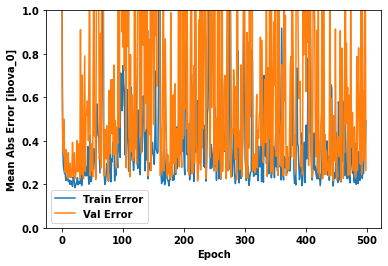

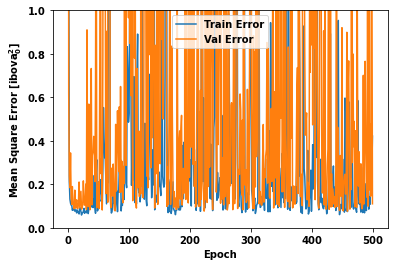

<IPython.core.display.Javascript object>

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [ibova_0]")
    plt.plot(hist["epoch"], hist["mae"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mae"], label="Val Error")
    plt.ylim([0, 1])
    plt.legend()

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [$ibova_0^2$]")
    plt.plot(hist["epoch"], hist["mse"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mse"], label="Val Error")
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


plot_history(history)

# Realizando as previsões

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

15/15 [==============================] - 0s 3ms/step


<IPython.core.display.Javascript object>

# Avaliando as previsões:

In [ ]:
def show_test_labels():
    # Imprimindo valores reais
    plt.plot(test_labels, color="r", label="ibova_REAL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("ibova_REAL")
    plt.legend()


def show_model_predictions():
    # Imprimindo previsoes
    plt.plot(test_predictions, color="g", label="predictions_MODEL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("predictions_MODEL")
    plt.legend()


def show_compare_graph():
    # Predictt X Real values
    plt.plot(test_labels, color="r", label="ibova_REAL")
    plt.plot(test_predictions, color="g", label="predictions_MODEL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("Predict X Real values")
    plt.legend()
    plt.show()


def show_true_predict_values():
    plt.figure(figsize=(24, 4))
    plt.scatter(test_labels, test_predictions)
    plt.xlabel("True Values [ibova_0]")
    plt.ylabel("Predictions [ibova_0]")
    plt.axis("equal")
    plt.axis("square")
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])

<IPython.core.display.Javascript object>

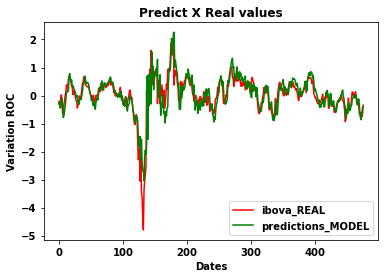

<IPython.core.display.Javascript object>

In [ ]:
show_compare_graph()

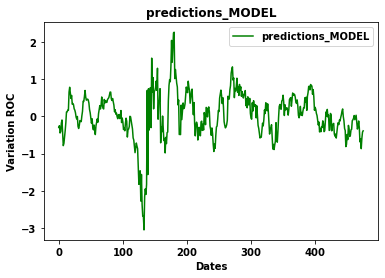

<IPython.core.display.Javascript object>

In [ ]:
show_model_predictions()

In [ ]:
model_name = f'mlp_unit_1({best_hps.get("unit_1")})unit_2({best_hps.get("unit_2")})unit_3({best_hps.get("unit_3")})unit_4({best_hps.get("unit_4")})_learning({best_hps.get("learning_rate")})_activation({best_hps.get("activation")})'
model_name
model.save(f"models/mlp/{model_name}date_{save_time}.h5")

<IPython.core.display.Javascript object>

In [ ]:
# Analisando Medias:

print(f"Massa de predição: {test_predictions.mean()}")
print(f"Massa inicial: {ibova_test.mean()}")
print(f"Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}")

# Add o RM_MSE medio

Massa de predição: 0.03259638696908951


NameError: name 'ibova_test' is not defined

<IPython.core.display.Javascript object>

In [ ]:
save_time

'22_08_30_22h55m31'

<IPython.core.display.Javascript object>